## Imports

In [ ]:
import numpy as np
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

## Preprocessing



### Load dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


### Data normalization

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Learning

### Building CNN



In [ ]:
X_input = tf.keras.layers.Input((32,32,3))
X = tf.keras.layers.experimental.preprocessing.Resizing(224,224)(X_input)

base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3), input_tensor=X, include_top = False, weights = 'imagenet')

base_model.trainable = False

In [ ]:
base_model.output

<tf.Tensor 'conv5_block3_out/Identity:0' shape=(None, 7, 7, 2048) dtype=float32>

In [ ]:
X = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
X = tf.keras.layers.Dense(units=100, activation='softmax')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X, name='ResNet50')

opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
resizing_1 (Resizing)           (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           resizing_1[0][0]                 
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
___________________________________________________________________________________________

### Train

In [ ]:
history = model.fit(X_train, y_train, batch_size=100, validation_split=0.1, epochs=5)

Epoch 1/5
 40/450 [=>............................] - ETA: 2:13 - loss: 4.7248 - sparse_categorical_accuracy: 0.0095

KeyboardInterrupt: ignored

### Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_train, y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 2s 21ms/step - loss: 4.6053 - sparse_categorical_accuracy: 0.0100


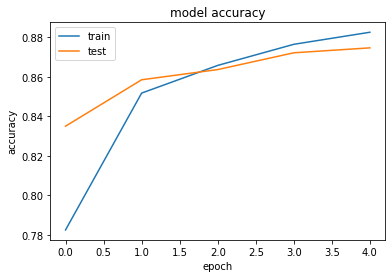

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()